# Quickstart

`geoplot` is a geospatial data visualization library designed for data scientists and geospatial analysts that just want to get things done. In this tutorial we will learn the basics of `geoplot` and see how it is used.

I recommend reading this notebook using [NBViewer](https://nbviewer.jupyter.org/github/ResidentMario/geoplot/blob/master/notebooks/tutorials/Quickstart.ipynb) or, better yet, following along interactively using [Binder](https://mybinder.org/v2/gh/ResidentMario/geoplot/master?filepath=notebooks/tutorials/Quickstart.ipynb).

In [1]:
# Configure matplotlib.
%matplotlib inline

# Unclutter the display.
import pandas as pd; pd.set_option('max_columns', 6)

## Working with geospatial data

The starting point for geospatial analysis is geospatial data. The standard way of dealing with such data in Python using `geopandas`&mdash;a geospatial data parsing library over the well-known `pandas` library.

In [2]:
import geopandas as gpd

`geoplot` represents data using a `GeoDataFrame`, which is just a `pandas` `DataFrame` with a special `geometry` column containing a geometric object describing the physical nature of the record in question: a `POINT` in space, a `POLYGON` in the shape of New York, and so on.

In [3]:
import geoplot as gplt
usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.2962732 48.23250950000011)
1,101,52838.0,830.0,ND,POINT (-97.03285469999997 47.92525680000006)
2,153,15427.0,1407.0,ND,POINT (-98.70843569999994 46.91054380000003)
3,177,105549.0,902.0,ND,POINT (-96.78980339999998 46.87718630000012)
4,192,17787.0,2411.0,ND,POINT (-102.7896241999999 46.87917560000005)


It's important to note that `shapely`, the library `geopandas` uses to store its geometries, uses "modern" longitude-latitude `(x, y)` coordinate order. This differs from the "historical" latitude-longitude `(y, x)` coordinate order. Datasets "in the wild" may be in either format, so after reading in some data make sure to verify that your coordinates are in the right order!

This is the bare minimum you need to know about geospatial data to work with `geoplot`.

To learn more about geospatial data in Python refer to the section of the tutorial on [Working with Geospatial Data](https://nbviewer.jupyter.org/github/ResidentMario/geoplot/blob/master/notebooks/tutorials/Working%20with%20Geospatial%20Data.ipynb).

## Basic usage

If you have ever worked with `geopandas` before you are probably familiar with `plot`, which can be used to quickly and easily plot the data in a `GeoDataFrame`:

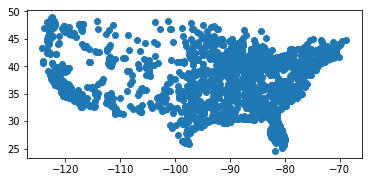

In [4]:
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
continental_usa_cities.plot()

We can replicate this result with nicer defaults using the `pointplot` function in `geoplot`:

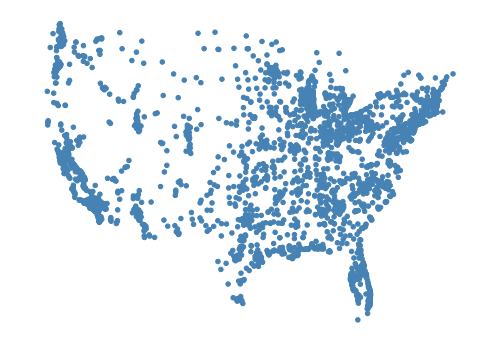

In [5]:
import geoplot as gplt
gplt.pointplot(continental_usa_cities)

If you have polygonal data instead, you can plot that using a `geoplot` `polyplot`.

In [8]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

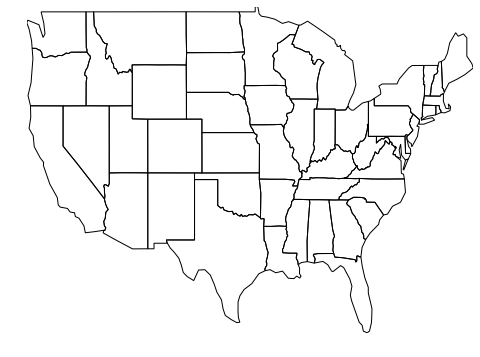

In [7]:
gplt.polyplot(contiguous_usa)

There we go, our first ``geoplot`` plot!

We can combine the these two plots using overplotting. **Overplotting** is the act of stacking several different plots on top of one another, useful for providing additional context for our plots:

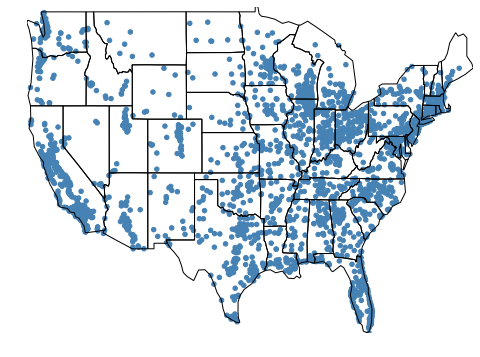

In [9]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax)

You might notice that this map of the United States looks very strange. The Earth, being a sphere, is impossible to potray in two dimensionals. Hence, whenever we take data off the sphere and place it onto a map, we are using some kind of **projection**, or method of flattening the sphere. Plotting data without a projection, or "carte blanche", creates distortion in your map. We can "fix" the distortion by picking a better projection.

The Albers equal area projection is one most common in the United States. Here's how you use it with `geoplot`:

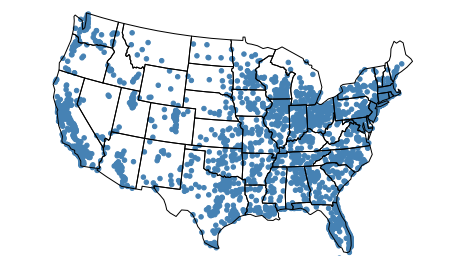

In [28]:
import geoplot.crs as gcrs

proj = gcrs.AlbersEqualArea()
ax = gplt.polyplot(contiguous_usa, projection=proj)
gplt.pointplot(continental_usa_cities, ax=ax, projection=proj)

This looks much better than our first plot! In fact, this is the version of the United States that you'll probably most often see in maps; and it's just one of dozens of projections provided in `geoplot`.

To learn more about projections check out the section of the tutorial on [Working with Projection](https://nbviewer.jupyter.org/github/ResidentMario/geoplot/blob/master/notebooks/tutorials/Working%20with%20Projections.ipynb).

What if you want to make your plot prettier? `geoplot` is based on the venerable `matplotlib` (via `cartopy`), and thus has tons of options for customizing your plots:

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Cities in the contiguous United States, 2010')

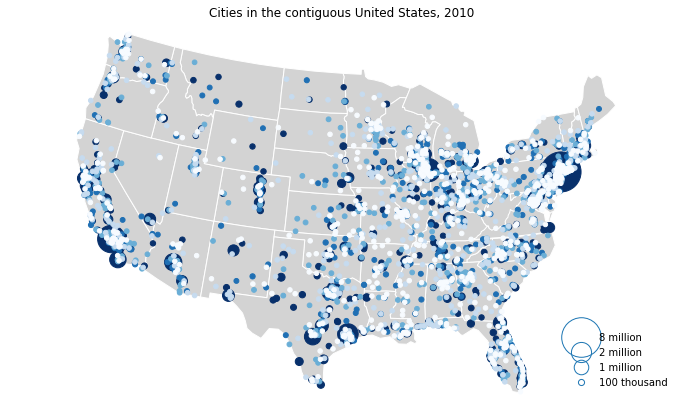

In [41]:
import matplotlib.pyplot as plt

proj = gcrs.AlbersEqualArea()

ax = gplt.polyplot(
    contiguous_usa, 
    zorder=-1,  # place the state shapes below the cities.
    linewidth=1,
    projection=proj,
    edgecolor='white',
    facecolor='lightgray',
    figsize=(12, 12)  # make the figure bigger.
)

gplt.pointplot(
    continental_usa_cities, 
    scale='POP_2010',  # set point size based on population
    limits=(1, 80),    # scale points from 1x to 80x
    hue='POP_2010',    # Changing the color with population, too...
    cmap='Blues',          # ...more blue, more people...
    k=5,                   # but let's limit ourselves to just five "classes" of city sizes.
    legend=True,           # Show a legend...
    legend_var='scale',    # ...based on circle size...
    legend_values=[8000000, 2000000, 1000000, 100000],
    legend_labels=['8 million', '2 million', '1 million', '100 thousand'],  # ...with these five values...
    legend_kwargs={'frameon': False, 'loc': 'lower right'},  # ...on the lower right.
    ax=ax, 
    projection=proj
)

plt.title("Cities in the contiguous United States, 2010")  # add a title

For a detailed guide to the plot customization options available in `geoplot`, check out the section of the tutorial on [Customizing Plots](https://nbviewer.jupyter.org/github/ResidentMario/geoplot/blob/master/notebooks/tutorials/Customizing%20Plots.ipynb).

<!-- TODO: contextily -->

## More plotting options

`geoplot` is organized in terms of **plots**. There are seven different plot types, each of which has strengths, weaknesses, and expected data types.

We have seen two so far: `polyplot` and `pointplot`.

`polyplot` is the simplest plot in `geoplot`. It takes polygonal data (a `GeoDataFrame` with `POLYGON` or `MULTIPOLYGON` objects in the `geometry` column) as input, and provides a map of those polygons as output. It is used for adding a **basemap** to your visualiaztion: a representation of the space which adds context to the data you are actually trying to display.

`pointplot` is a geospatial scatter plot. It takes point data (a `GeoDataFrame` with `POINT` objects in the `geometry` column) as input, and provides a map of those points as output. If your data consists of a set of points, this plot type is a good fist choice: it's easy, obviously, and easily explainable.

In this section we will take a brief tour of the remaining plot types. For even more examples showcasing these plots in action, check out the [Gallery](https://residentmario.github.io/geoplot/gallery.html).

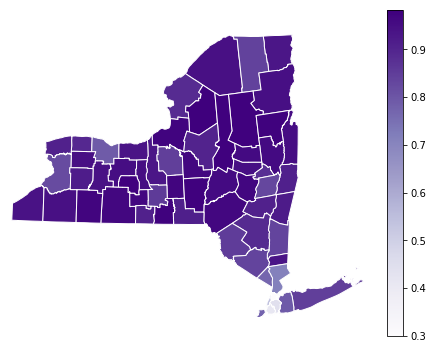

In [18]:
%matplotlib inline
import geoplot as gplt
import geopandas as gpd

# import the data
ny_census_tracts = gpd.read_file(gplt.datasets.get_path('ny_census'))
ny_census_tracts = ny_census_tracts.assign(
    percent_white=ny_census_tracts['WHITE'] / ny_census_tracts['POP2000']
)

# set the projection
import geoplot.crs as gcrs
proj = gcrs.AlbersEqualArea()

# plot
gplt.choropleth(
    ny_census_tracts, 
    hue='percent_white',
    projection=proj,
    cmap='Purples',
    edgecolor='white',
    k=None,  # use a continuous colormap
    legend=True
)

The [**choropleth**](https://en.wikipedia.org/wiki/Choropleth_map) is a well-known plot type; it's pretty much the bread and butter of cartographers. A `choropleth` partitions an area into a set of polygons, then colors those geometries according to some scale and some data input. Choropleths are a standard-bearer map type for displaying statistical information about regions of interest.

Our example application is a map of New York built out of [statistical areas](https://en.wikipedia.org/wiki/New_York_statistical_areas) from the 2010 US Census (other common partitioning schemes common include countries, states, census tracts, census blocks, police precincts, city blocks...). Each area is colormapped to the percentage of residents in the region who identify ethnically as white. The key observation this map makes that New York City is far more ethnically diverse than the rest of New York.

Choropleths are easy to make and easy to interpret&mdash;a great first choice for area aggregation data.

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


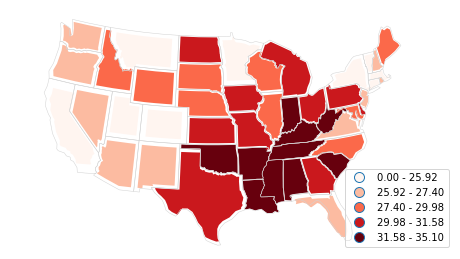

In [26]:
%matplotlib inline
import geoplot as gplt
import geopandas as gpd
import pandas as pd

# import the data
obesity_by_state = pd.read_csv(gplt.datasets.get_path('obesity_by_state'), sep='\t')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
contiguous_usa['Obesity Rate'] = contiguous_usa['State'].map(
    lambda state: obesity_by_state.query("State == @state").iloc[0]['Percent']
)

# set the projection
import geoplot.crs as gcrs
proj = gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)

# plot
gplt.cartogram(
    contiguous_usa,
    scale='Obesity Rate',
    hue='Obesity Rate',
    cmap='Reds',
    projection=proj,
    limits=(0.75, 1),
    linewidth=0.5,
    k=5,
    trace_kwargs={'linewidth': 0.5, 'zorder': 100},
    legend=True,
    legend_kwargs={'loc': 'lower right'},
    legend_var='hue',
)

A [**cartograms**](https://en.wikipedia.org/wiki/Cartogram) are a much less common but potentially more visually impactful alternative to the choropleth. In a `cartogram`, each of the areas in question is scaled according to its value. For example, in this map we have plotted the states of the United States according to their obesity rates. Using both color and scale information, we can quickly pick out the healthiest (Colorado) and unhealthiest (Missisipi, Arkasas, West Virginia) states.

These plot types are both polygonal. What if we want to reason spatially about point data?

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


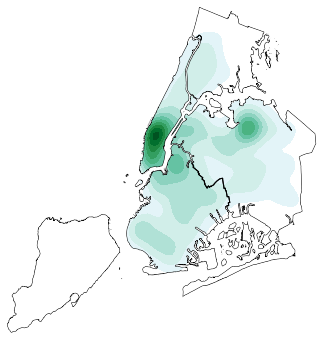

In [25]:
import geoplot as gplt
import geopandas as gpd

# import the data
nyc_collision_factors = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))
nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))

# set the projection
import geoplot.crs as gcrs
proj = gcrs.AlbersEqualArea()

# plot
ax = gplt.kdeplot(
    nyc_collision_factors,
    projection=proj, 
    shade=True,  # Shade the areas or draw relief lines?
    shade_lowest=False,  # Don't shade near-zeros.
    clip=nyc_boroughs.geometry,  # Constrain the heatmap to this area.
)
gplt.polyplot(nyc_boroughs, projection=proj, ax=ax)

A `kdeplot` constructs a heatmap for an area by applying a [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) function across the points in a dataset.

The `kdeplot` is a great tool for examining the distribution of groups of points. For example, this plot of collisions in New York City makes it clear where the accident hotspots in the city are located: Midtown Manhattan and, to a lesser extent, Downtown Brooklyn and LaGuardia.

You can tweak the `kdeplot` output to tune how many levels are plotted (more detailed plots require more data). If you have too *many* points (order of hundreds of thousands), the plot may take too long to generate; in this case you should downsample using e.g. `sample(5000)`.

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


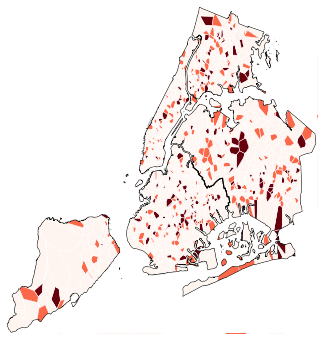

In [1]:
%matplotlib inline
import geoplot as gplt
import geopandas as gpd

# import the data
nyc_injurious_collisions = gpd.read_file(gplt.datasets.get_path('nyc_injurious_collisions'))
nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))

# set the projection
import geoplot.crs as gcrs
proj = gcrs.AlbersEqualArea()

# plot
ax = gplt.voronoi(
    nyc_injurious_collisions.head(2000),
    hue='NUMBER OF PERSONS INJURED', cmap='Reds',
    edgecolor='white', clip=nyc_boroughs.geometry,
    linewidth=0.5,
    projection=proj,
)
gplt.polyplot(nyc_boroughs, linewidth=1, projection=proj, ax=ax)

A `voronoi` plot is an alternative method of partitioning a space using point data. The `voronoi` plot uses [voronoi tesselation](https://en.wikipedia.org/wiki/Voronoi_diagram) to construct neighborhoods around each point in the dataset. Each neighborhood consists of all points closest to a particular observation. Apply a colormap to the result and you get a choropleth of neighborhoods.

A `voronoi` plot is basically a `choropleth`, except that instead of defining areas ourselves we build them algorithmically.

**Note** `voronoi` is still experimental.

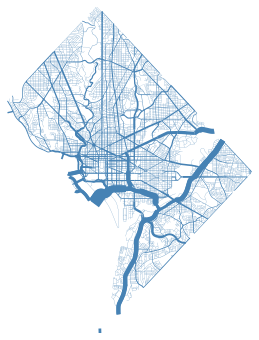

In [1]:
%matplotlib inline
import geoplot as gplt
import geopandas as gpd

# import the data
dc_roads = gpd.read_file(gplt.datasets.get_path('dc_roads'))

# set the projection
import geoplot.crs as gcrs
proj = gcrs.AlbersEqualArea()

# plot the data
gplt.sankey(
    dc_roads,
    path=dc_roads.geometry,
    projection=proj,
    scale='aadt',
    limits=(0.1, 10)
)

So far we've worked with point data and polygonal data. A third feature type of import is linear or network data. Examples of linear data include raffic movements between cities, or the flow of immigrantion between different countries. For this type of data you can use the `sankey` plot, which builds a [Sankey diagram](https://en.wikipedia.org/wiki/Sankey_diagram) out of your data.

In this example we can see the road network for Washington DC, taken from Department of Transit data. Road segments with more traffic on them are thicker than those with less (you can also use color as your visual variable instead of width, if you so prefer; or even use both). This plot makes it easy to see where the major arterial roads in Washington DC are.

Sankey plots are a flexible way of representing linear feature data. They work great when you have linear features with relatively little overlap, but they struggle with datasets with overlapping or near-overlapping features, which are easily occluded by one another.

## What to do next

You should now know enough `geoplot` to be able to start to use it in your own projects.

You can install `geoplot` using `conda install geoplot`, or alternative using `pip install geoplot` (but see notes in [Installation](../Installation.html)).

To keep learning about `geoplot` (and geospatial data in Python in general) check out the [User Guides](https://residentmario.github.io/geoplot/guides.html).

Finally, the [API Reference](../api.html) is the definitive guide all of to the options available for the plot types in `geoplot`.